## Prerequisites

In [519]:
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install regex
# !pip install matplotlib
# !pip install scipy
# !pip install PyEnchant

Import the necessary python libraries to do the exploratory data analysis.

In [520]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
import enchant

%matplotlib inline

plt.style.use('bmh')

carroya_df = pd.read_csv('carroya_data.csv')
tucarro_df = pd.read_csv('tucarro_data.csv')

## First glance at the datasets

### CarroYa

In [521]:
carroya_df.head()

,Unnamed: 0,NOMBRE,SUBTITULO,PRECIO,PRECIO MENSUAL,KILOMETRAJE,ANIO,TIPO DE CAJA,CILINDRAJE,COMBUSTIBLE,COLOR,ESTADO,UBICACIÓN,DIRECCIÓN,PLACA,PUERTAS,AIRBAGS,IMAGEN
0,0,Mercedes Benz Clase GLA,200 Automatico,$122.900.000,$3.058.891,22.036 km,2020,Secuencial,1.6,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
1,1,Volkswagen Tiguan,2.0 Comfortline 4MOTION,$99.900.000,$2.486.438,39.024 km,2018,Secuencial,2.0,Gasolina,Otro,usado,Bogotá D.C.,NaN,**6 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
2,2,Jaguar XE,Prestige 2.0 T,$102.900.000,$2.561.105,15.192 km,2017,Secuencial,2.0,Gasolina,Negro,usado,Bogotá D.C.,NaN,**3 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
3,3,Mitsubishi Outlander,Phev,$105.900.000,$2.635.773,46.690 km,2017,Automática,2.0,Híbrido,Gris,usado,Bogotá D.C.,NaN,**8 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...
4,4,Mercedes Benz Clase CLA,200,$122.900.000,$3.058.891,22.036 km,2020,Automática,1.6,Gasolina,Blanco,usado,Bogotá D.C.,NaN,**5 Bogota,NaN,Airbags,https://www.carroya.com/web/images/vehiculos/2...


In [522]:
carroya_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10880 non-null  int64  
 1   NOMBRE          10880 non-null  object 
 2   SUBTITULO       6977 non-null   object 
 3   PRECIO          10880 non-null  object 
 4   PRECIO MENSUAL  10880 non-null  object 
 5   KILOMETRAJE     10880 non-null  object 
 6   ANIO            10880 non-null  int64  
 7   TIPO DE CAJA    10852 non-null  object 
 8   CILINDRAJE      10880 non-null  float64
 9   COMBUSTIBLE     9616 non-null   object 
 10  COLOR           10787 non-null  object 
 11  ESTADO          10880 non-null  object 
 12  UBICACIÓN       10880 non-null  object 
 13  DIRECCIÓN       7811 non-null   object 
 14  PLACA           10200 non-null  object 
 15  PUERTAS         695 non-null    float64
 16  AIRBAGS         1923 non-null   object 
 17  IMAGEN          10880 non-null 

Some numeric columns were identified as object by pandas. CILINDRAJE and PUERTAS that have integers values were misidentified as floating-point values. PRECIO, PRECIO MENSUAL and KILOMETRAJE have undesired characters ("$", "km", ".").

In [523]:
carroya_df.isnull().sum().sort_values(ascending = False)

PUERTAS           10185
AIRBAGS            8957
SUBTITULO          3903
DIRECCIÓN          3069
COMBUSTIBLE        1264
PLACA               680
COLOR                93
TIPO DE CAJA         28
UBICACIÓN             0
ESTADO                0
Unnamed: 0            0
NOMBRE                0
CILINDRAJE            0
ANIO                  0
KILOMETRAJE           0
PRECIO MENSUAL        0
PRECIO                0
IMAGEN                0
dtype: int64

Some columns such as PUERTAS and AIRBAGS have too many missing values. SUBTITULO and DIRECCIÓN also have a significant amount of NaN values.

### TuCarro

In [524]:
tucarro_df.head()

,Titulo,Marca,Modelo,Ano,Color,Tipo de combustible,Puertas,Transmision,Motor,Tipo de carroceria,Kilometros,Img,Precio
0,Vendo - Automovil Antiguo Dodge Desoto 1938 - ...,Dodge,dodge desoto D8,1938.0,NaN,Gasolina,4.0,Mecánica,NaN,Sedán,100000 km,https://http2.mlstatic.com/D_NQ_NP_646157-MCO4...,70.000.000
1,Jeep Willys Cj 2a 1946 Cj2a,Jeep,Willys,1946.0,BEIGE BLANCO,Gasolina,2.0,Mecánica,2200,NaN,100000 km,https://http2.mlstatic.com/D_NQ_NP_719379-MCO4...,40.000.000
2,Jeep Cj3a Cj3a,Willys,willys Cj3a,1950.0,NaN,Gasolina,3.0,Mecánica,NaN,NaN,123 km,https://http2.mlstatic.com/D_NQ_NP_820535-MCO4...,30.000.000
3,Jeep Willys Cj3a,Jeep,Willys,1951.0,NaN,Gasolina,2.0,Mecánica,NaN,NaN,3000 km,https://http2.mlstatic.com/D_NQ_NP_758316-MCO4...,43.000.000
4,Ford F100,Ford,F-100,1952.0,Gris,Gasolina,2.0,Mecánica,1500,Pick-Up,125000 km,https://http2.mlstatic.com/D_NQ_NP_814571-MCO4...,26.000.000


In [525]:
tucarro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26829 entries, 0 to 26828
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titulo               26827 non-null  object 
 1   Marca                26778 non-null  object 
 2   Modelo               26778 non-null  object 
 3   Ano                  26778 non-null  float64
 4   Color                16518 non-null  object 
 5   Tipo de combustible  26773 non-null  object 
 6   Puertas              26656 non-null  float64
 7   Transmision          26778 non-null  object 
 8   Motor                22628 non-null  object 
 9   Tipo de carroceria   22521 non-null  object 
 10  Kilometros           26777 non-null  object 
 11  Img                  26827 non-null  object 
 12  Precio               26827 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.7+ MB


Ano y Puertas that have integers values were recognized as floating-point values by pandas. Kilometros have undesired characters ("km", ".").

In [526]:
tucarro_df.isnull().sum().sort_values(ascending = False)

Color                  10311
Tipo de carroceria      4308
Motor                   4201
Puertas                  173
Tipo de combustible       56
Kilometros                52
Marca                     51
Modelo                    51
Ano                       51
Transmision               51
Titulo                     2
Img                        2
Precio                     2
dtype: int64

Color have too many NaN values, Tipo de carrroceria and Motor also have a significant amout of missing values. Precio is missing 2 values, probably we're going to drop that rows.

## Joining the datasets

In [527]:
def get_marca(data):
    arr = data.split(' ')
    if arr[0] == 'Mercedes':
        return " ".join(arr[:2])
    else:
        return " ".join(arr[:1])
    
def get_modelo(data):
    arr = data.split(' ')
    if arr[0] == 'Mercedes':
        return " ".join(arr[2:])
    else:
        return " ".join(arr[1:])
    
carroya_df['Marca'] = carroya_df['NOMBRE'].apply(get_marca)
carroya_df['Modelo'] = carroya_df['NOMBRE'].apply(get_modelo)
carroya_df = carroya_df.rename(columns = {'PRECIO' : 'Precio', 'TIPO DE CAJA' : 'Transmision',
                                          'ANIO' : 'Anio', 'COMBUSTIBLE' : 'Tipo de combustible',
                                         'KILOMETRAJE' : 'Kilometros', 'IMAGEN' : 'Img', 
                                         'COLOR' : 'Color', 'PUERTAS' : 'Puertas',
                                          'CILINDRAJE' : 'Motor'})
carroya_df['Titulo'] = carroya_df['NOMBRE'] + ' ' + carroya_df['SUBTITULO'].fillna('')
carroya_df = carroya_df.drop(columns = ['NOMBRE', 'SUBTITULO', 'PRECIO MENSUAL', 'ESTADO',
                                        'UBICACIÓN', 'DIRECCIÓN', 'PLACA', 'AIRBAGS',
                                        'Unnamed: 0'])
tucarro_df = tucarro_df.rename(columns = {'Ano' : 'Anio'})
cols = ['Titulo','Marca', 'Modelo', 'Precio', 'Anio', 'Kilometros', 'Color', 'Transmision',
        'Tipo de combustible','Tipo de carroceria', 'Motor', 'Puertas', 'Img']
tucarro_df = tucarro_df[cols]

In [528]:
df = pd.concat([tucarro_df, carroya_df], ignore_index = True, axis = 0)
df = df.reset_index(drop = True)

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titulo               37707 non-null  object 
 1   Marca                37658 non-null  object 
 2   Modelo               37658 non-null  object 
 3   Precio               37707 non-null  object 
 4   Anio                 37658 non-null  float64
 5   Kilometros           37657 non-null  object 
 6   Color                27305 non-null  object 
 7   Transmision          37630 non-null  object 
 8   Tipo de combustible  36389 non-null  object 
 9   Tipo de carroceria   22521 non-null  object 
 10  Motor                33508 non-null  object 
 11  Puertas              27351 non-null  float64
 12  Img                  37707 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.7+ MB


In [530]:
df.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
0,Vendo - Automovil Antiguo Dodge Desoto 1938 - ...,Dodge,dodge desoto D8,70.000.000,1938.0,100000 km,NaN,Mecánica,Gasolina,Sedán,NaN,4.0,https://http2.mlstatic.com/D_NQ_NP_646157-MCO4...
1,Jeep Willys Cj 2a 1946 Cj2a,Jeep,Willys,40.000.000,1946.0,100000 km,BEIGE BLANCO,Mecánica,Gasolina,NaN,2200,2.0,https://http2.mlstatic.com/D_NQ_NP_719379-MCO4...
2,Jeep Cj3a Cj3a,Willys,willys Cj3a,30.000.000,1950.0,123 km,NaN,Mecánica,Gasolina,NaN,NaN,3.0,https://http2.mlstatic.com/D_NQ_NP_820535-MCO4...
3,Jeep Willys Cj3a,Jeep,Willys,43.000.000,1951.0,3000 km,NaN,Mecánica,Gasolina,NaN,NaN,2.0,https://http2.mlstatic.com/D_NQ_NP_758316-MCO4...
4,Ford F100,Ford,F-100,26.000.000,1952.0,125000 km,Gris,Mecánica,Gasolina,Pick-Up,1500,2.0,https://http2.mlstatic.com/D_NQ_NP_814571-MCO4...


In [531]:
df.tail()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
37704,Toyota Starlet,Toyota,Starlet,$16.000.000,1999.0,16.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37705,Dodge Caravan,Dodge,Caravan,$89.000.000,2019.0,16.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37706,Mitsubishi Lancer,Mitsubishi,Lancer,$30.000.000,2005.0,1.600.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37707,JEEP Commander,JEEP,Commander,$135.000.000,2019.0,20.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg
37708,Dodge Dart,Dodge,Dart,$20.000.000,2019.0,25.000 km,No Disponible,0,NaN,NaN,0.0,NaN,/static/media/cy_img_nodisponible@3x.48afd719.jpg


Now the datasets are joined, but still have NaN values, misidentified Dtypes and unwanted characters in some columns.

## Data cleaning

### Numerical variables

In [532]:
def clean_int(column, pattern, df):
    df[column] = df[column].replace(pattern, '', regex = True).astype(np.int64)

def clean_color(color):
    if pd.isna(color):
        color = 'No Disponible'
    return color

def clean_puerta(door):
    if pd.isna(door):
        door = 4
    return door

def get_number(number):
    if len(number) == 1:
        if int(number) > 7:
            number += '00'
        else:
            number += '000'
    elif len(number) == 2:
        number += '00'
    elif len(number) == 3:
        if int(number) < 700:
            number += '0'
    elif len(number) > 4:
        number = number[:4]
    return number

def clean_cilindraje(txt):
    if txt == '0.0':
        number = np.NaN
    else:
        number = re.sub('[\.]', '', txt)
        number = get_number(number)
    return number

def clean_motor(txt):
    if txt == '0.0':
        number = np.NaN
    else:
        numbers = re.findall(r'[-+]?\d*\.\d+|\d+', txt)
        if len(numbers) > 0:
            if len(numbers) == 2:
                number = numbers[0] if float(numbers[0]) > float(numbers[1]) else numbers[1]
                number = re.sub('[\.]', '', number)
            else:
                number = re.sub('[\.]', '', numbers[0])
            number = get_number(number)
        else:
            number = np.NaN
        return number

Since we have NaN in important columns such as Precio, Marca, Modelo y Kilometros, and are less than 150 rows, which only represents 0.3% of the data, we're going to drop them.

In [533]:
df = df[df['Kilometros'].notna()]

In [534]:
clean_int('Precio', '[.$]', df) 
clean_int('Kilometros', '[km.]', df)
df['Motor'] = df['Motor'].astype(str)
df['Motor'] = df['Motor'].apply(clean_motor)
df['Motor'] = df['Motor'].astype('float').astype('Int64')
df['Puertas'] = df['Puertas'].astype('Int64')
df['Puertas'] = df['Puertas'].apply(clean_puerta)
df['Color'] = df['Color'].apply(clean_color)
df['Anio'] = df['Anio'].astype(int)

### Categorical variables

In [535]:
df['Marca'].unique()

array(['Dodge', 'Jeep', 'Willys', 'Ford', 'Volkswagen', 'Chevrolet',
       'Mercury', 'Toyota', 'Land Rover', 'FARGO 60', 'wolswagen',
       'Jeep Willys', 'Mercedes-Benz', 'Nissan', 'Renault', 'Daihatsu',
       'Fiat', 'DAHIATSU', 'BMW', 'Lada', 'Suzuki', 'Aro',
       'Willys Servicio Publ', 'Kia', 'Honda', 'Subaru', 'Porsche',
       'Mitsubishi', 'Volkswagen Mk1 turbo', 'Volvo', 'Renault 4 R4',
       'Mazda', 'Acura', 'SPRINT NEGRO', 'Tyota', 'Oldsmobile', 'Mini',
       'Hyundai', 'Daewoo', 'Dacia', 'Cadillac', 'Peugeot', 'Skoda',
       'Audi', 'Citroën', 'Mitsubishi 7 puestos', 'Baic', 'Chrysler',
       'Alfa Romeo', 'Nissan D 21', 'Plymouth', 'Sprint', 'Iveco', 'SEAT',
       'Dahiatsu', 'Lexus', 'General', 'Ssangyong', 'Pontiac',
       'Gran cherokee límite', 'Huinday accent', 'Rover', 'Camioneta luv',
       'volskwagen', 'GMC', 'honda civic',
       'Toyota Land Cruiser 4.7 Vxr Uzj100', 'NPR', 'Tata', 'Mazda323',
       'Hummer', 'Maserati', 'CitroÃ«n', 'Ssanyong',
   

In [536]:
print(len(df['Marca'].unique()))

203


In [537]:
pwl = enchant.request_pwl_dict("brands.txt")
unique = df['Marca'].unique()

def clean_marca(marca):
    marca_list = marca.split()
    marca_temp = marca_list[0]
    marca_temp = marca_temp.title()
    suggest = pwl.suggest(marca_temp)
    if suggest and marca_temp != 'Land':
    #if suggest:
        #print(marca_temp + ' --> ' + suggest[0])
        marca = suggest[0]
    elif len(marca_list) > 1:
        marca_temp = marca_temp + ' ' + marca_list[1].title()
        #print(marca_temp)
        suggest = pwl.suggest(marca_temp)
        if suggest:
            #print(suggest)
            #print(marca_temp + ' --> ' + suggest[0])
            marca = suggest[0]
    #else:
        #print(marca)
    return marca

df['Marca'] = df['Marca'].apply(clean_marca)
df['Marca'] = df['Marca'].replace(['RENAULT-DUSTER'], 'Renault')
df['Marca'] = df['Marca'].replace(['Camioneta Dong Feng'], 'Dongfeng')
df['Marca'] = df['Marca'].replace(['D-MAX'], 'Chevrolet')
df['Marca'] = df['Marca'].replace(['Camion Mercedes benz'], 'Mercedes-Benz')
df['Marca'] = df['Marca'].replace(['SPRINT NEGRO'], 'Chevrolet')
df['Marca'] = df['Marca'].replace(['Wolkwanguen'], 'Volkswagen')
df['Marca'] = df['Marca'].replace(['ZX'], 'Zhongxing')
df['Marca'] = df['Marca'].replace(['Willys'], 'Jeep')
df['Marca'] = df['Marca'].replace(['Camioneta KIA PREGIO'], 'Kia')
df['Marca'] = df['Marca'].replace(['Land'], 'Land Rover')
removals = df['Marca'].value_counts().reset_index()
removals = removals[removals['Marca'] >= 10]['index'].values
df = df[df['Marca'].isin(removals)]
df = df.reset_index(drop = True)
df['Marca'].value_counts()

Chevrolet        5307
Renault          4117
Ford             2911
Toyota           2845
Mazda            2590
Nissan           2586
Kia              2225
Volkswagen       2076
Mercedes-Benz    1883
BMW              1803
Hyundai          1240
Audi              817
Suzuki            757
Mitsubishi        618
Jeep              556
Honda             519
Dodge             510
Peugeot           467
Volvo             350
Ssangyong         278
Citroen           247
Fiat              247
Mini              245
Land Rover        219
Subaru            217
Chery             212
Porsche           161
Seat              157
Skoda             120
Daihatsu          112
Acura             108
Jaguar            105
JBC                99
Daewoo             85
DFM/DFSK           77
Lexus              77
Changan            66
Foton              59
DS                 45
MG                 43
Alpina             41
Baic               33
Zotye              30
RAM                29
JMC                28
Hafei     

In [538]:
df['Marca'].unique()

array(['Dodge', 'Jeep', 'Ford', 'Volkswagen', 'Chevrolet', 'Toyota',
       'Land Rover', 'Mercedes-Benz', 'Nissan', 'Renault', 'Daihatsu',
       'Fiat', 'BMW', 'Suzuki', 'Kia', 'Honda', 'Subaru', 'Porsche',
       'Mitsubishi', 'Volvo', 'Mazda', 'Acura', 'Mini', 'Hyundai',
       'Daewoo', 'Cadillac', 'Peugeot', 'Skoda', 'Audi', 'Citroen',
       'Baic', 'Chrysler', 'Alpina', 'Seat', 'Lexus', 'Ssangyong',
       'Hummer', 'Maserati', 'Hafei', 'Foton', 'DFM/DFSK', 'Chery',
       'Zotye', 'Jinbei', 'Lifan', 'Geely', 'RAM', 'Changan', 'JBC',
       'BYD', 'MG', 'Mahindra', 'JMC', 'Brilliance', 'Changhe', 'Jaguar',
       'DS'], dtype=object)

In [539]:
print(len(df['Marca'].unique()))

57


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37539 entries, 0 to 37538
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               37539 non-null  object
 1   Marca                37539 non-null  object
 2   Modelo               37539 non-null  object
 3   Precio               37539 non-null  int64 
 4   Anio                 37539 non-null  int64 
 5   Kilometros           37539 non-null  int64 
 6   Color                37539 non-null  object
 7   Transmision          37512 non-null  object
 8   Tipo de combustible  36275 non-null  object
 9   Tipo de carroceria   22485 non-null  object
 10  Motor                29763 non-null  Int64 
 11  Puertas              37539 non-null  int64 
 12  Img                  37539 non-null  object
dtypes: Int64(1), int64(4), object(8)
memory usage: 3.8+ MB


In [541]:
#brands = df['Marca'].unique()

#textfile = open("unique_brands.txt", "w")

#for brand in brands:
    #textfile.write(brand + "\n")
#textfile.close()

Now the data is clean and we can analyze it.

In [542]:
def sumTC(type):
    return (df['Tipo de combustible'].values == type).sum()

df["Tipo de combustible"].replace({'Diésel':'Diesel'}, inplace=True)
df["Tipo de combustible"].replace({np.nan:'Gasolina'}, inplace=True)
df["Tipo de combustible"].replace({'Gasolina y gas':'Gasolina y Gas'}, inplace=True)
df["Tipo de combustible"].replace({'Gas Natural':'Gas'}, inplace=True)

print(df["Tipo de combustible"].unique())
for t in df["Tipo de combustible"].dropna().unique():
    print(t + ': ' + str(sumTC(t)))

['Gasolina' 'Diesel' 'Gasolina y Gas' 'Eléctrico' 'Híbrido' 'Gas']
Gasolina: 32876
Diesel: 3682
Gasolina y Gas: 460
Eléctrico: 155
Híbrido: 227
Gas: 139


## Data Analysis

In [543]:
df.isnull().sum().sort_values(ascending = False)

Tipo de carroceria     15054
Motor                   7776
Transmision               27
Titulo                     0
Marca                      0
Modelo                     0
Precio                     0
Anio                       0
Kilometros                 0
Color                      0
Tipo de combustible        0
Puertas                    0
Img                        0
dtype: int64

In [544]:
df.describe()

,Precio,Anio,Kilometros,Motor,Puertas
count,3.753900e+04,37539.000000,3.753900e+04,29763.000000,37539.000000
mean,7.246991e+07,2012.997549,1.256453e+05,2138.743473,4.318389
std,1.821458e+08,8.316434,5.291179e+06,957.861017,10.425196
min,1.250000e+03,1938.000000,0.000000e+00,16.000000,1.000000
25%,3.120000e+07,2011.000000,2.591550e+04,1600.000000,4.000000
50%,4.990000e+07,2015.000000,6.500000e+04,2000.000000,4.000000
75%,8.400000e+07,2018.000000,1.100000e+05,2500.000000,5.000000
max,2.808886e+10,2022.000000,9.967677e+08,9990.000000,2018.000000


The extremely high max value and low min value of Precio indicates that we might have dirty data and outliers.

In [545]:
temp = df.sort_values(by = ['Precio'], ascending = False)
temp.head(10)

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
35882,Cadillac El Dorado 2.8L,Cadillac,El Dorado,28088855569,2021,25860,Gris,Automática,Diesel,NaN,1005,4,https://www.carroya.com/web/images/vehiculos/1...
35870,AUDI A5,Audi,A5,9999955566,2021,2580,Gris,Mecánica,Gasolina,NaN,2580,4,https://www.carroya.com/web/images/vehiculos/1...
27760,AUDI A5,Audi,A5,9999955566,2021,2580,Gris,Mecánica,Gasolina,NaN,2580,4,https://www.carroya.com/web/images/vehiculos/1...
30968,Nissan X-trail Classic,Nissan,X-trail Classic,1111111111,2011,11111111,Blanco,0,Gasolina,NaN,<NA>,4,https://www.carroya.com/web/images/vehiculos/2...
35867,AUDI A5 1.8 Cabrio TFSI Multitronic,Audi,A5,999999999,2021,1322234,Beige,Mecánica,Gasolina,NaN,2889,4,https://www.carroya.com/web/images/vehiculos/1...
35868,BMW 1800 Automatico 4p,BMW,1800,999999999,2020,3000,Gris,Mecánica,Gas,NaN,1800,4,https://www.carroya.com/web/images/vehiculos/1...
30888,Volkswagen Gurgel Xarante,Volkswagen,Gurgel Xarante,999999999,2020,111111,No Disponible,Mecánica,Gasolina,NaN,<NA>,4,/static/media/cy_img_nodisponible@3x.48afd719.jpg
35871,Ford Escort LX 1.9 Automatico,Ford,Escort,999999999,2020,1000,Gris,Mecánica,Diesel,NaN,779,4,https://www.carroya.com/web/images/vehiculos/1...
35879,Ford 36 Coupe 1600 mecanico,Ford,36 Coupe,999999999,2020,8900,Gris,Mecánica,Diesel,NaN,<NA>,4,https://www.carroya.com/web/images/vehiculos/1...
33178,AUDI A3,Audi,A3,999999999,2016,88900,Gris,Mecánica,Gas,NaN,9887,4,https://www.carroya.com/web/images/vehiculos/1...


In [546]:
temp = df.sort_values(by = ['Precio'], ascending = True)
temp.head(10)

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
3796,Mazda 626 2.0 Na0,Mazda,626,1250,2006,2000,No Disponible,Mecánica,Gasolina,Sedán,2000,4,https://http2.mlstatic.com/D_NQ_NP_655221-MCO4...
714,Chevrolet Trooper 2.6 Dlx,Chevrolet,Trooper,1900,1990,1,Azul,Mecánica,Gasolina,Camioneta,2600,5,https://http2.mlstatic.com/D_NQ_NP_828624-MCO4...
1148,Chevrolet Trooper Standar 2400,Chevrolet,Trooper,1900,1994,251000,No Disponible,Mecánica,Gasolina,NaN,<NA>,3,https://http2.mlstatic.com/D_NQ_NP_681454-MCO4...
26664,Chevrolet Sail 1.4 Ltz Sport,Chevrolet,Sail,2334,2021,999999,No Disponible,Automática,Gasolina,Hatchback,1400,5,https://http2.mlstatic.com/D_NQ_NP_996784-MCO4...
1562,Mazda 626 Mazda 626 Matsuri,Mazda,626,5500,1996,7,No Disponible,Automática,Gasolina,NaN,<NA>,4,https://http2.mlstatic.com/D_NQ_NP_986815-MCO4...
1825,Mitsubishi Lancer 1.3 Gl 4 p 82 hp,Mitsubishi,Lancer,8800,1997,260000,No Disponible,Mecánica,Gasolina,Sedán,1300,4,https://http2.mlstatic.com/D_NQ_NP_831330-MCO4...
1327,Nissan Sentra 1.6 B13 Super Saloon 110 hp,Nissan,Sentra,9000,1995,300000,No Disponible,Mecánica,Gasolina,Sedán,1600,4,https://http2.mlstatic.com/D_NQ_NP_784028-MCO4...
2280,Renault Laguna 2.0,Renault,Laguna,9500,1999,205000,No Disponible,Mecánica,Gasolina,NaN,<NA>,5,https://http2.mlstatic.com/D_NQ_NP_636490-MCO4...
17073,Kia Sportage 2.0 Revolution 166 hp,Kia,Sportage,10000,2016,63000,No Disponible,Mecánica,Gasolina,Camioneta,2000,5,https://http2.mlstatic.com/D_NQ_NP_925669-MCO4...
2352,Jeep Grand Cherokee 4.7 Laredo,Jeep,Grand Cherokee,10000,2000,100,No Disponible,Automática,Gasolina,Camioneta,4700,5,https://http2.mlstatic.com/D_NQ_NP_823304-MCO4...


In [547]:
df = df[(df['Precio'] > 3000000) & (df['Precio'] < 300000000)]

The dataset have cars with unreal prices like 1250 COP and exorbitant prices such as 28088855569 COP and 9999955566 COP, so we decided to put a minimum and maximum value of Precio in order to eliminate noise and have more reliable information. Kilometros and Puertas also have outliers

To get ride of outliers, we're going to delete values +- 3 SD mean.

In [548]:
df = df[(np.abs(stats.zscore(df['Precio'])) < 3)]
df = df[(np.abs(stats.zscore(df['Puertas'])) < 3)]
df = df[(np.abs(stats.zscore(df['Kilometros'])) < 3)]
df = df.reset_index(drop = True)

In [549]:
df.describe()

,Precio,Anio,Kilometros,Motor,Puertas
count,3.597700e+04,35977.000000,3.597700e+04,28775.000000,35977.000000
mean,5.972005e+07,2012.892265,8.688319e+04,2105.949991,4.261083
std,4.026296e+07,8.249521,1.802744e+05,919.582996,0.810014
min,3.100000e+06,1938.000000,0.000000e+00,16.000000,1.000000
25%,3.100000e+07,2011.000000,2.759000e+04,1600.000000,4.000000
50%,4.800000e+07,2015.000000,6.600000e+04,2000.000000,4.000000
75%,7.900000e+07,2018.000000,1.110000e+05,2400.000000,5.000000
max,2.050000e+08,2022.000000,1.545645e+07,9990.000000,16.000000


In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35977 entries, 0 to 35976
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Titulo               35977 non-null  object
 1   Marca                35977 non-null  object
 2   Modelo               35977 non-null  object
 3   Precio               35977 non-null  int64 
 4   Anio                 35977 non-null  int64 
 5   Kilometros           35977 non-null  int64 
 6   Color                35977 non-null  object
 7   Transmision          35955 non-null  object
 8   Tipo de combustible  35977 non-null  object
 9   Tipo de carroceria   21592 non-null  object
 10  Motor                28775 non-null  Int64 
 11  Puertas              35977 non-null  int64 
 12  Img                  35977 non-null  object
dtypes: Int64(1), int64(4), object(8)
memory usage: 3.6+ MB


In [551]:
temp = df.sort_values(by = ['Precio'], ascending = False)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
18264,Ford Focus Rs,Ford,Focus,205000000,2017,22300,Azul,Mecánica,Gasolina,NaN,<NA>,5,https://http2.mlstatic.com/D_NQ_NP_682334-MCO4...
22645,Land Rover Evoque P-250 2.0,Land Rover,Evoque,205000000,2020,16700,No Disponible,Automática,Gasolina,NaN,<NA>,5,https://http2.mlstatic.com/D_NQ_NP_917304-MCO4...
8195,Toyota Land Cruiser 4.5 Imperial Lc200 Diésel,Toyota,Land Cruiser,205000000,2012,146000,Plateado,Mecánica,Diesel,Camioneta,4500,5,https://http2.mlstatic.com/D_NQ_NP_735843-MCO4...
21420,Land Rover Discovery Sport,Land Rover,Discovery sport,205000000,2019,2200,Gris,Automática,Gasolina,SUV,4000,5,https://http2.mlstatic.com/D_NQ_NP_842261-MCO4...
28954,BMW X3,BMW,X3,205000000,2019,10200,Negro,Automática,Gasolina,NaN,<NA>,4,https://www.carroya.com/web/images/vehiculos/2...


In [552]:
temp = df.sort_values(by = ['Precio'], ascending = True)
temp.head()

,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
1489,Renault R19 Rt 1.8,Renault,R19,3100000,1996,100000,No Disponible,Mecánica,Gasolina,Sedán,1800,4,https://http2.mlstatic.com/D_NQ_NP_624147-MCO4...
481,Mazda 626 1.8 L,Mazda,626,3200000,1986,12000,No Disponible,Mecánica,Gasolina,Sedán,1800,4,https://http2.mlstatic.com/D_NQ_NP_856780-MCO4...
576,Renault R19 Gts,Renault,R19,3500000,1989,400000,No Disponible,Mecánica,Gasolina,NaN,<NA>,4,https://http2.mlstatic.com/D_NQ_NP_759873-MCO4...
28991,Chevrolet Monza 2.0 Mecanico,Chevrolet,Monza,3500000,1990,765564,Verde,Automática,Gasolina,NaN,2000,4,https://www.carroya.com/web/images/vehiculos/1...
452,Mazda 323 1.3 Hb,Mazda,323,3500000,1985,999,Violeta,Mecánica,Gasolina,Hatchback,1300,5,https://http2.mlstatic.com/D_NQ_NP_943444-MCO4...


In [553]:
def columnCategories(col):
    print(col + ": " + str(df[col].nunique()))

columnCategories("Titulo")
columnCategories("Marca")
columnCategories("Modelo")
columnCategories("Color")
columnCategories("Transmision")
columnCategories("Tipo de combustible")

Titulo: 12572
Marca: 57
Modelo: 1544
Color: 870
Transmision: 7
Tipo de combustible: 6


## Visualization

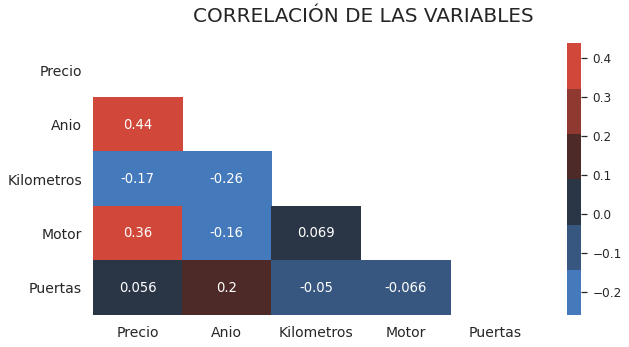

In [554]:
sns.set_theme(style="white")
fig, axs = plt.subplots(figsize = (10,5))
fig.suptitle('CORRELACIÓN DE LAS VARIABLES', fontsize=20)
axs.tick_params(axis = 'y', labelsize = 14, pad = 5)
axs.tick_params(axis = 'x', labelsize = 14, pad = 5)
sns.set(font_scale = 1.1)
cmap = sns.diverging_palette(250, 15, center="dark")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)

plt.show()

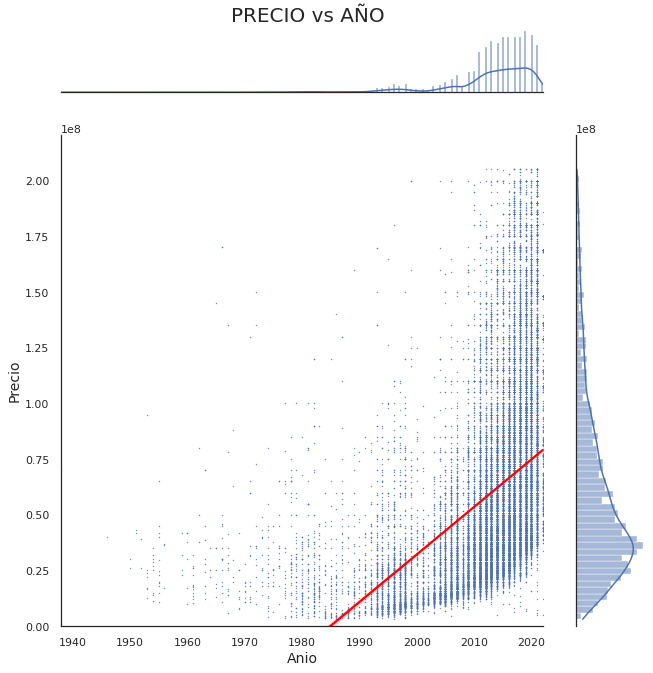

In [555]:
sns.set_theme(style="white")
plot = sns.jointplot(data = df, x = 'Anio', y = 'Precio', color='b', kind = 'reg', line_kws={'color': 'red'}, scatter_kws={'s': 2})

plot.fig.suptitle('PRECIO vs AÑO', fontsize=20)
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.95)
plot.fig.set_size_inches(10,10)

plot.set_axis_labels('Anio', 'Precio', fontsize=14)
plot.ax_marg_y.set_ylim(bottom=0)

plt.show()

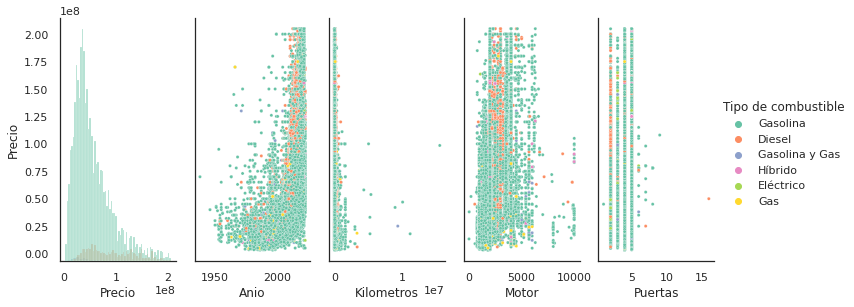

In [556]:
x_vars = ["Precio", "Anio", "Kilometros", "Motor","Puertas"]
y_vars = ["Precio"]

graph = sns.PairGrid(data=df, hue='Tipo de combustible', x_vars=x_vars, y_vars=y_vars, palette="Set2", diag_sharey=True)
graph.fig.set_size_inches(10,5)

graph.map_offdiag(sns.scatterplot, s=10)
graph.map_diag(sns.histplot) 

graph.add_legend()

plt.show()

Chevrolet      5226
Ford           2789
Kia            2199
Mazda          2571
Nissan         2545
Others        12011
Renault        4089
Toyota         2482
Volkswagen     2065
Name: Marca, dtype: int64


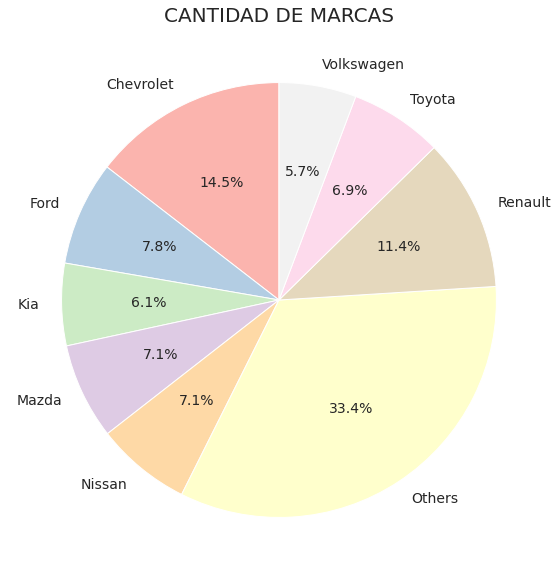

In [557]:
lista_marcas = df['Marca'].unique()
conteo_marcas = df['Marca'].value_counts()[:8]
other = pd.Series([df['Marca'].value_counts().sum() - conteo_marcas.sum()], index=['Others'], name='Marca')

conteo_marcas = pd.concat([conteo_marcas, other], axis=0)
conteo_marcas = conteo_marcas.sort_index()

print(conteo_marcas)

conteo_marcas.plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', startangle=90, fontsize=14, cmap='Pastel1')

plt.title('CANTIDAD DE MARCAS', fontsize=20)
plt.ylabel('')

plt.show()

<ipython-input-558-5e4920501b10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm.Marca[~dfm.Marca.str.contains('|'.join(list(conteo_marcas.index)))] = 0


,Titulo,Marca,Modelo,Precio,Anio,Kilometros,Color,Transmision,Tipo de combustible,Tipo de carroceria,Motor,Puertas,Img
10098,Chevrolet Sonic 1.6 Lt 5 p,Chevrolet,Sonic,33900000,2013,53000,Plateado,Mecánica,Gasolina,Hatchback,1600,5,https://http2.mlstatic.com/D_NQ_NP_995147-MCO4...
23854,Chevrolet Onix 1.4 Ltz 5 p,Chevrolet,Onix,44000000,2020,13000,No Disponible,Mecánica,Gasolina,Hatchback,1400,5,https://http2.mlstatic.com/D_NQ_NP_861867-MCO4...
15472,Chevrolet N300 1.2 Cargo Plus,Chevrolet,N300,34900000,2016,151657,No Disponible,Mecánica,Gasolina,Furgón,1200,2,https://http2.mlstatic.com/D_NQ_NP_978831-MCO4...
15475,Chevrolet Sail 1.4,Chevrolet,Sail,27000000,2016,90142,No Disponible,Mecánica,Gasolina,NaN,<NA>,4,https://http2.mlstatic.com/D_NQ_NP_917164-MCO4...
23846,Chevrolet Spark GT 1.2 Ls,Chevrolet,Spark GT,35000000,2020,65000,No Disponible,Mecánica,Gasolina,Hatchback,1200,5,https://http2.mlstatic.com/D_NQ_NP_772134-MCO4...


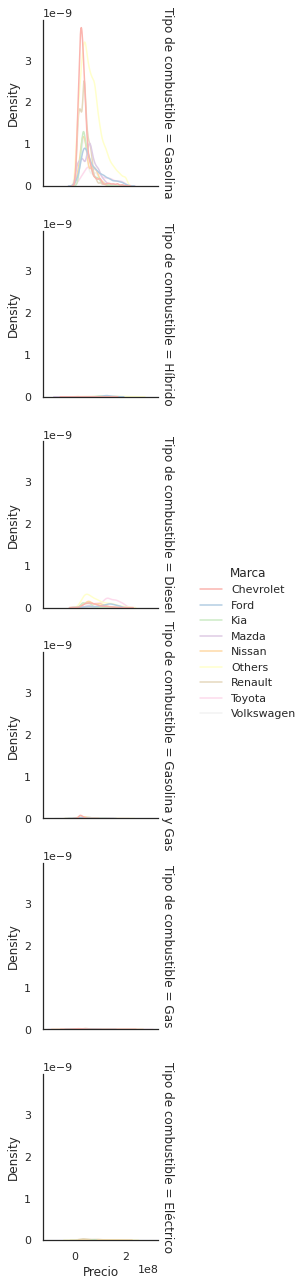

In [558]:
sns.set_theme(style="white")

dfm = df.copy()
dfm_marca = dfm.Marca
dfm.Marca[~dfm.Marca.str.contains('|'.join(list(conteo_marcas.index)))] = 0
dfm['Marca'].replace({0:'Others'}, inplace=True)
dfm = dfm.sort_values(by=['Marca'])

sns.set_palette("Pastel1")

sns.displot(
    dfm, x="Precio", row="Tipo de combustible", hue='Marca',
    height=3,
    facet_kws=dict(margin_titles=True),
    kind="kde"
)
dfm.head()

## Generating the CSV file

In [559]:
#df.to_csv('full_data.csv')